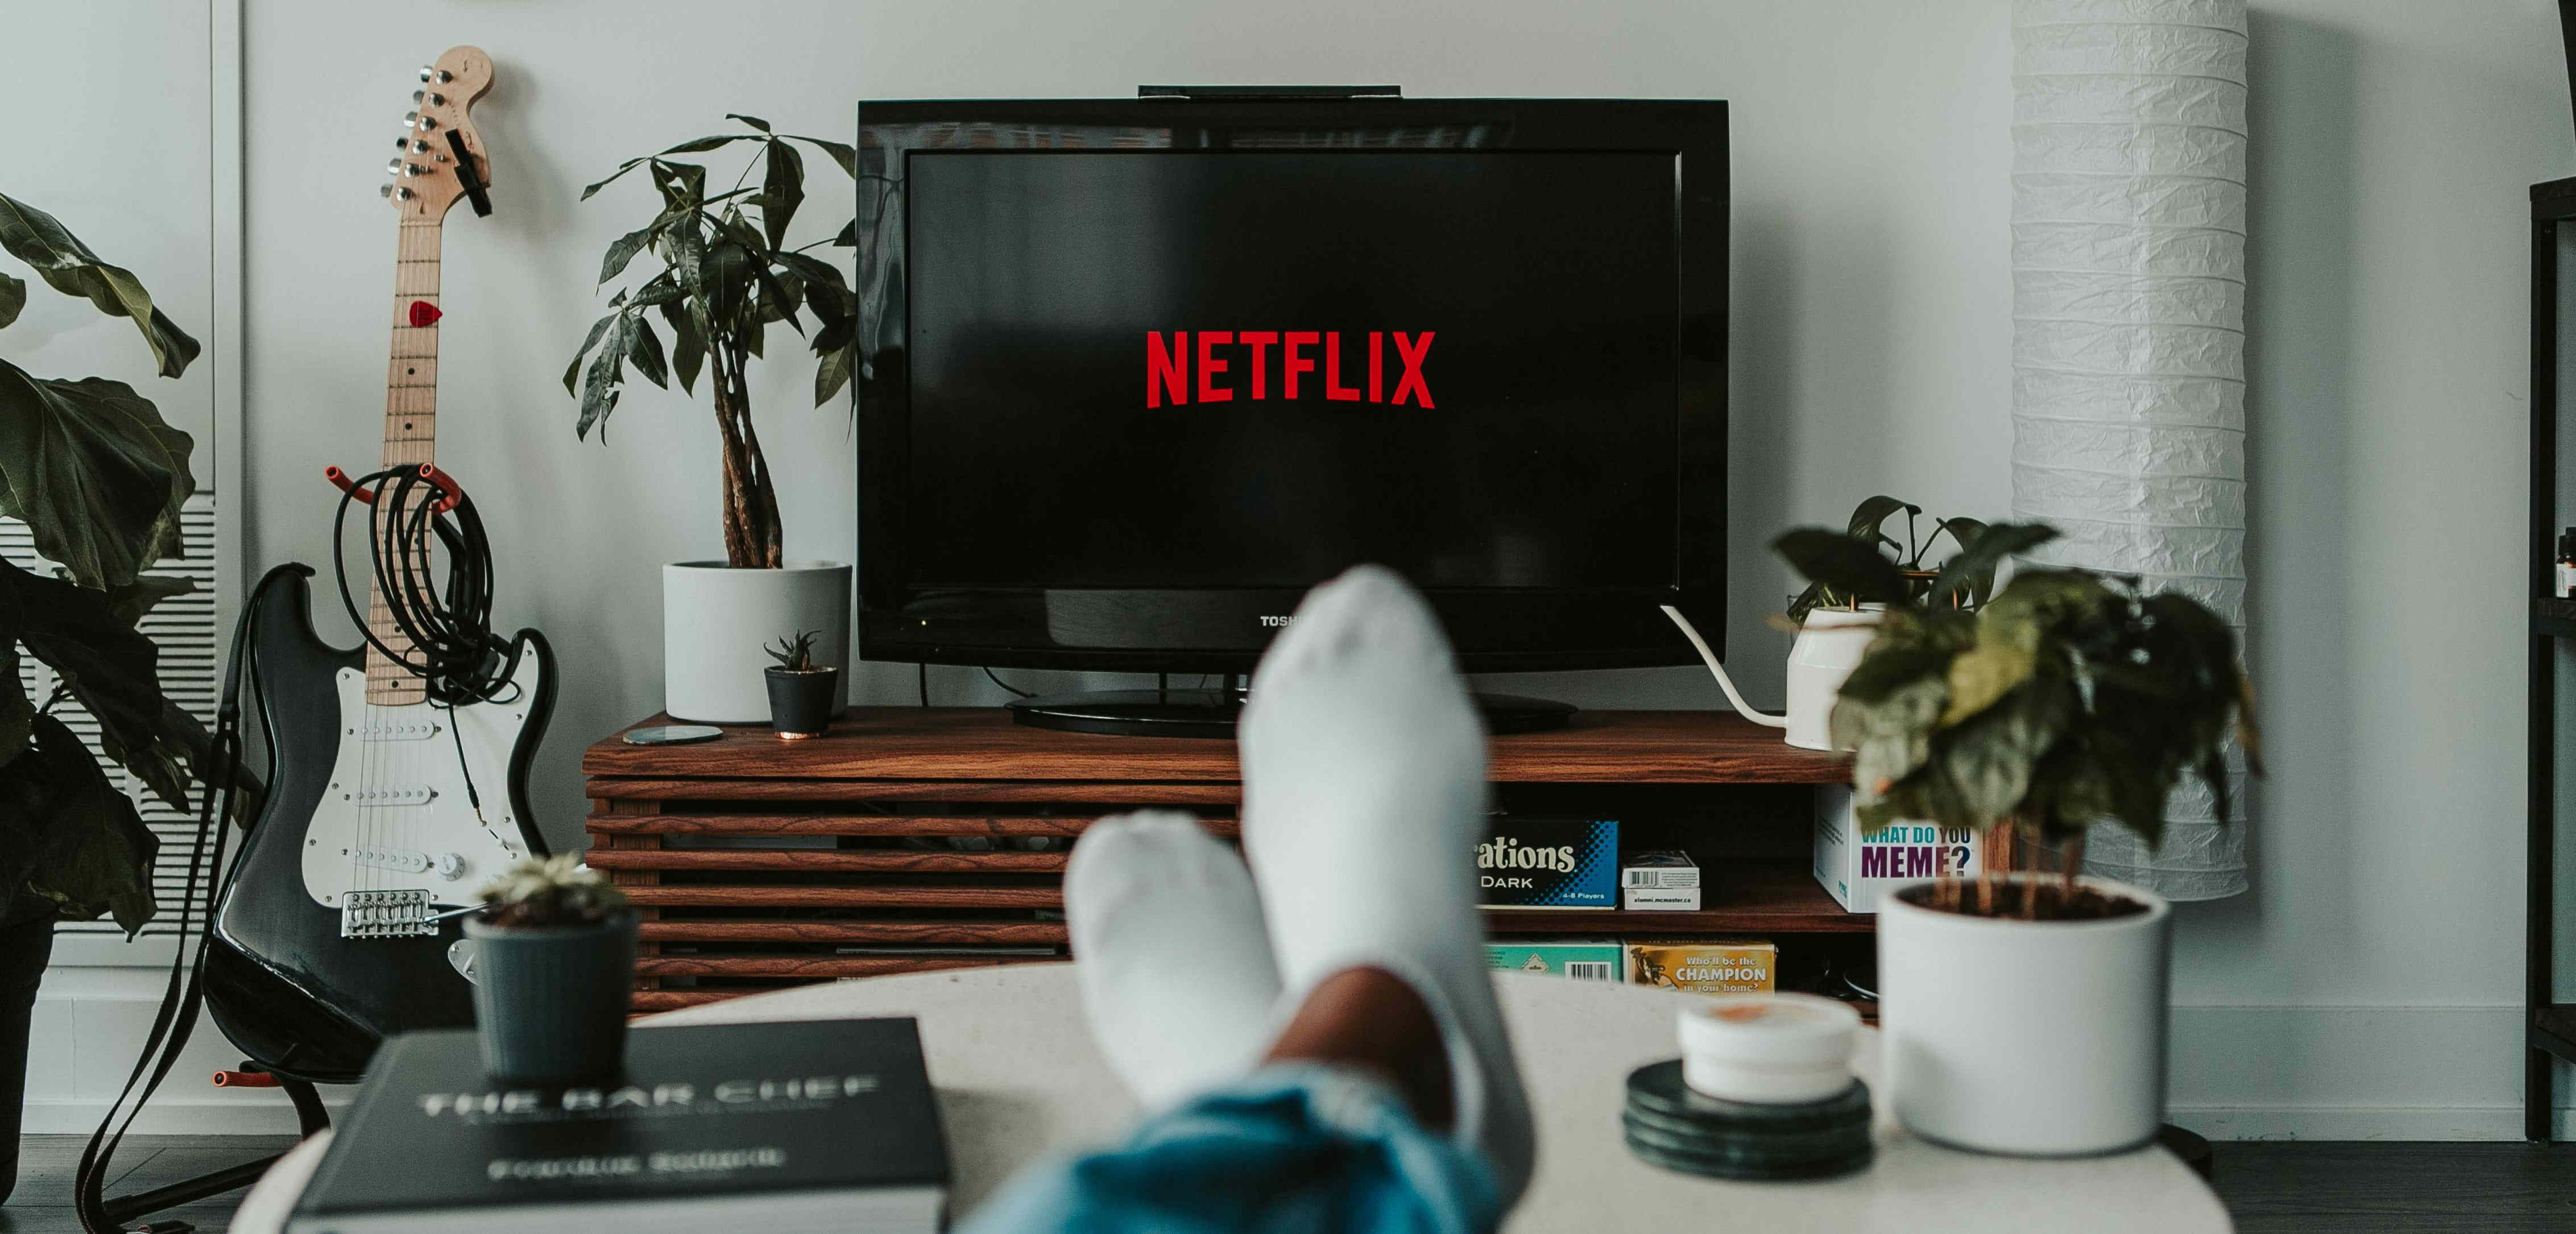

Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by market capitalization, boasting over 200 million subscribers as of January 2021.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. For their first order of business, they have been performing some analyses, and they believe that the average duration of movies has been declining.

As evidence of this, they have provided us with the following information. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.

In [13]:
# Create the years and durations lists
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {'released_years':[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
               'duration_time':[103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

# Print the dictionary
print(movie_dict)

{'released_years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'duration_time': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


In [14]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame([movie_dict])

# Print the DataFrame
print(durations_df)

                                      released_years  \
0  [2011, 2012, 2013, 2014, 2015, 2016, 2017, 201...   

                                  duration_time  
0  [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]  


In [9]:
#Visual inspection of the data

In [15]:
import matplotlib.pyplot as plt
fig= plt.figure()

<Figure size 432x288 with 0 Axes>

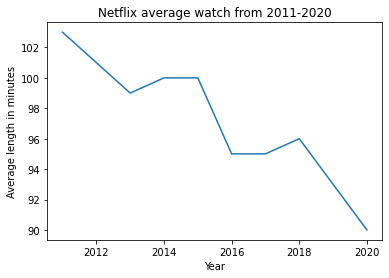

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()


plt.plot('released_years','duration_time', data= movie_dict)
plt.xlabel('Year')
plt.ylabel('Average length in minutes')
plt.title('Netflix average watch from 2011-2020')


plt.show()

In [22]:
#Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years! But equipped only with our friend's aggregations, we're limited in the further explorations we can perform. There are a few questions about this trend that we are currently unable to answer, including:

#What does this trend look like over a longer period of time?
#Is this explainable by something like the genre of entertainment?

In [23]:
#using netflix detail data with movies and genre with.csv file

In [44]:
netflix_df= pd.read_csv("C:/Users/Ronfo/Desktop/netflix_data.csv")
netflix_df.head()

C:\Users\Ronfo\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3,4,5,6,8,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating  duration  \
0  September 25, 2021        2020.0  PG-13      90.0   
1  September 24, 2021        2021.0  TV-MA       2.0   
2  September 24, 2021        2021.0  TV-MA       1.0   
3  September 24, 2021        2021.0  TV-MA       1.0   
4  September 24, 2021        2021.0  TV-MA       2.0   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [25]:
#creating subset dataframe to filter movies and columns specifically required to answer our questions
#so let's create a new DataFrame netflix_movies containing only title, country,type, release_year, and duration.

In [45]:
netflix_df_movies_only = netflix_df[netflix_df.type == 'Movie']
netflix_movies_col_subset = netflix_df_movies_only[['title','country','type','release_year','duration']]


netflix_movies_col_subset.head()

title  \
0               Dick Johnson Is Dead   
6   My Little Pony: A New Generation   
7                            Sankofa   
9                       The Starling   
12                      Je Suis Karl   

                                              country   type  release_year  \
0                                       United States  Movie        2020.0   
6                                                 NaN  Movie        2021.0   
7   United States, Ghana, Burkina Faso, United Kin...  Movie        1993.0   
9                                       United States  Movie        2021.0   
12                            Germany, Czech Republic  Movie        2021.0   

    duration  
0       90.0  
6       91.0  
7      125.0  
9      104.0  
12     127.0

In [29]:
#creating scatter plot

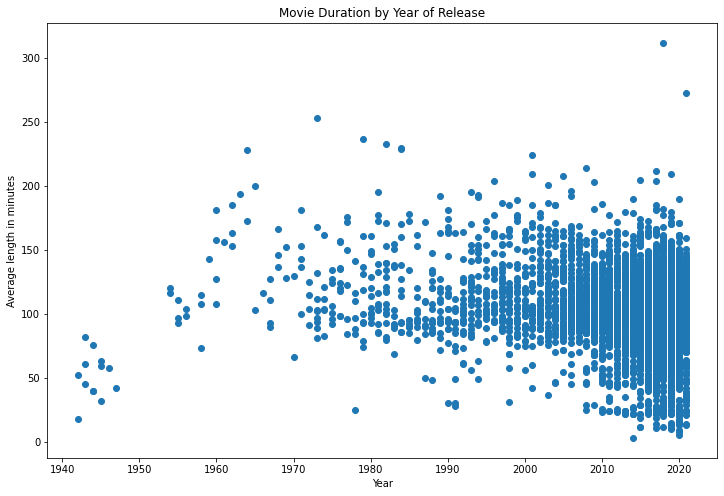

In [50]:
fig = plt.figure(figsize=(12,8))
plt.scatter(netflix_movies_col_subset.release_year, netflix_movies_col_subset.duration)
plt.xlabel('Year')
plt.ylabel('Average length in minutes')
plt.title("Movie Duration by Year of Release")

plt.show()

In [48]:
# This is already much more informative than the simple plot we created. We can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.
#Some of these films are under an hour long! Let's filter our DataFrame for movies with a duration under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.

In [49]:
# Filter for durations shorter than 60 minutes

In [52]:
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]


short_movies

title               country   type  \
45                  My Heroes Were Cowboys                   NaN  Movie   
71             A StoryBots Space Adventure                   NaN  Movie   
77           Little Singham - Black Shadow                   NaN  Movie   
279   Monster Hunter: Legends of the Guild  United States, Japan  Movie   
470            Bridgerton - The Afterparty                   NaN  Movie   
...                                    ...                   ...    ...   
8707                       We, the Marines         United States  Movie   
8723              What Makes a Psychopath?        United Kingdom  Movie   
8737            Why Are We Getting So Fat?        United Kingdom  Movie   
8759                World's Weirdest Homes                   NaN  Movie   
8763       WWII: Report from the Aleutians         United States  Movie   

      release_year  duration  
45          2021.0      23.0  
71          2021.0      13.0  
77          2021.0      48.0  
279         2021.0      59.0  
470         2021.0      39.0  
...            ...       ...  
8707        2017.0      38.0  
8723        2017.0      52.0  
8737        2016.0      50.0  
8759        2015.0      49.0  
8763        1943.0      45.0  

[458 rows x 5 columns]

In [53]:
#Interesting! It looks as though many of the films that are under 60 minutes

In [54]:
# let's try to add colors to type where we can check if Movies declined because of TV shows

In [57]:
colors = []

# Iterate over rows of netflix_movies_col_subset
for row, ser in netflix_movies_col_subset.iterrows():
    if ser['duration'] > 60 :
        colors.append('red')
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list        
print(colors[:11])

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']


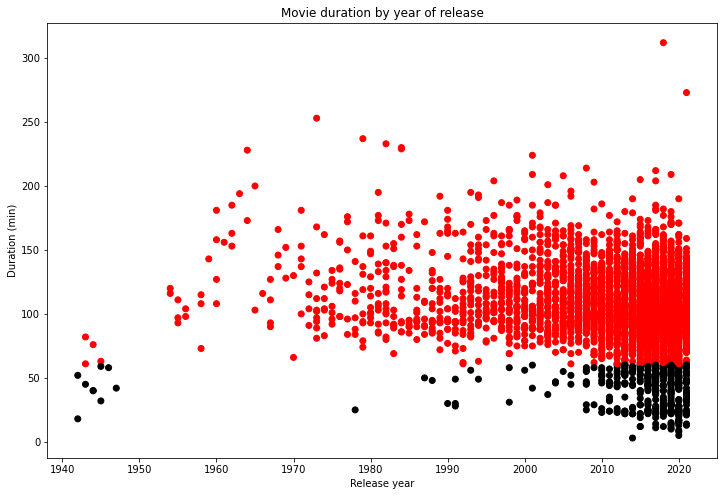

In [58]:
# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset.release_year, netflix_movies_col_subset.duration, c=colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()